In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time

Using TensorFlow backend.


In [2]:
# load this dataset easily using the Pandas
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [3]:
dataset.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date    3650 non-null object
Temp    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


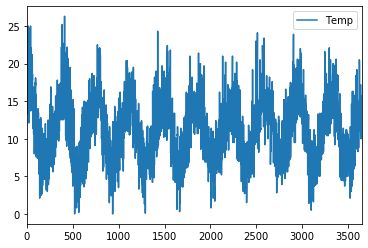

In [5]:
# plot the whole dataset. You can see some periodicity in the data set over time.
dataset.plot();

#### Data pre-processing

In [6]:
# fix random seed for reproducibility
np.random.seed(7)

In [7]:
# exclude the date column(each observation is separated by the same interval)
# extract the NumPy array from the dataframe
dataset = dataset[['Temp']].values

In [8]:
dataset.shape

(3650, 1)

In [9]:
dataset[:10]

array([[20.7],
       [17.9],
       [18.8],
       [14.6],
       [15.8],
       [15.8],
       [15.8],
       [17.4],
       [21.8],
       [20. ]])

In [10]:
# normalize the dataset (LSTMs are sensitive to the scale of the input data)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [11]:
# split into train and test sets (the sequence of values is important in time series)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2445 1205


In [12]:
# define a function to create a new dataset
# convert an array of values into a dataset matrix
# look_back = previous time steps to use as input variables to predict the next time period — in this case defaulted to 1
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t-1, t and Y=t+1   
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
trainX.shape

(2442, 2)

In [15]:
trainY.shape

(2442,)

In [16]:
# reshape input to be [samples, time steps, features]
# (n times steps of one input feature)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0] , testX.shape[1], 1))

In [17]:
trainX.shape

(2442, 2, 1)

#### LSTM Neural Network

In [19]:
# Define the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))

model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])


# Train the model
start = time.time()
model.fit(trainX, trainY, 
          epochs=100, 
          batch_size=1, 
          verbose=1, shuffle=False, 
          validation_data=(testX, testY))
          
end = time.time()

print ("Model took %0.2f seconds to train"%(end - start))

Train on 2442 samples, validate on 1202 samples
Epoch 1/100
2442/2442 [==============================] - 10s 4ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 2/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 3/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 4/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 5/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 6/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0

Epoch 50/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 51/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 52/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 53/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 54/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 55/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoc

2442/2442 [==============================] - 9s 4ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 100/100
2442/2442 [==============================] - 9s 4ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Model took 944.12 seconds to train


#### Compute RMSE

In [20]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0,:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.96 RMSE
Test Score: 2.98 RMSE


#### Plot predictions 

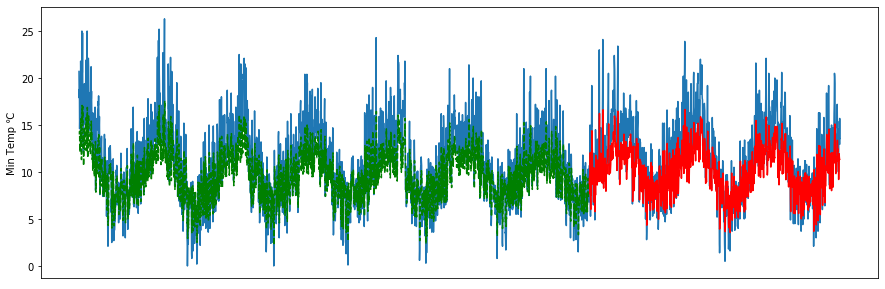

In [39]:
%matplotlib inline
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize= [15, 5])
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, color='green', linestyle='dashed')
plt.plot(testPredictPlot, color='red')
plt.ylabel('Min Temp ℃')
plt.xticks([])
plt.show()

#original dataset in blue 
#predictions for the training dataset in green
#predictions on the unseen test dataset in red